In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
#rcParams['text.usetex'] = True
#rcParams['font.family'] = 'serif'
import pandas as pd
#import ChiantiPy.core as ch
import copy
from scipy import interpolate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import juanfit

In [14]:
pop_process = scipy.io.readsav("../../sav/CHIANTI/FeX_FeXIV_pop_process.sav",verbose=True)

--------------------------------------------------
Date: Thu Nov 10 11:47:13 2022
User: yjzhu
Host: 0587449807.wireless.umich.net
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 12 records of which:
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
 - 9 are of type VARIABLE
--------------------------------------------------
Available variables:
 - fex_in [<class 'numpy.ndarray'>]
 - fex_out [<class 'numpy.ndarray'>]
 - fexiv_in [<class 'numpy.ndarray'>]
 - fexiv_out [<class 'numpy.ndarray'>]
 - out_exp [<class 'numpy.ndarray'>]
 - in_exp [<class 'numpy.ndarray'>]
 - r_distance [<class 'numpy.ndarray'>]
 - streamer_dens [<class 'numpy.ndarray'>]
 - streamer_temp [<class 'numpy.ndarray'>]
--------------------------------------------------


In [4]:
pop_process["fex_in"].shape

(9, 101)

In [12]:
pop_process["in_exp"]

array([b'rad_decay', b'e_exc', b'e_deexc', b'p_exc', b'p_deexc',
       b'ph_exc', b'ph_deexc', b'rr', b'dc'], dtype=object)

In [15]:
FeX_in_norm = pop_process["fex_in"]/np.sum(pop_process["fex_in"],axis=0)
FeX_out_norm = pop_process["fex_out"]/np.sum(pop_process["fex_out"],axis=0)
FeXIV_in_norm = pop_process["fexiv_in"]/np.sum(pop_process["fexiv_in"],axis=0)
FeXIV_out_norm = pop_process["fexiv_out"]/np.sum(pop_process["fexiv_out"],axis=0)

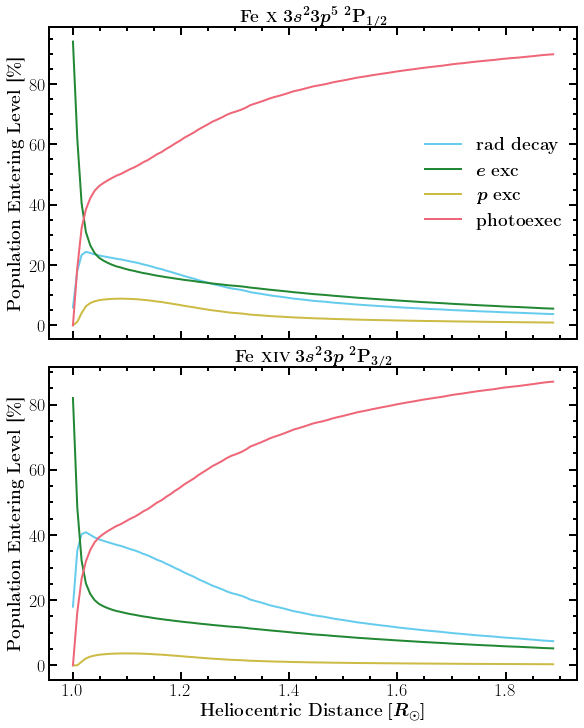

In [36]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,10),constrained_layout=True)

ax1.plot(pop_process["r_distance"],FeX_in_norm[0,:]*1e2,label=r"\textbf{rad decay}",
        color="#66CCEE",lw=2)
ax1.plot(pop_process["r_distance"],FeX_in_norm[1,:]*1e2,label=r"$\boldsymbol{e}$ \textbf{exc}",
        color="#228833",lw=2)
ax1.plot(pop_process["r_distance"],FeX_in_norm[3,:]*1e2,label=r"$\boldsymbol{p}$ \textbf{exc}",
        color="#CCBB44",lw=2)
ax1.plot(pop_process["r_distance"],FeX_in_norm[6,:]*1e2,label=r"\textbf{photoexec}",
        color="#EE6677",lw=2)

ax2.plot(pop_process["r_distance"],FeXIV_in_norm[0,:]*1e2,label=r"\textbf{rad decay}",
        color="#66CCEE",lw=2)
ax2.plot(pop_process["r_distance"],FeXIV_in_norm[1,:]*1e2,label=r"$\boldsymbol{e}$ \textbf{exc}",
        color="#228833",lw=2)
ax2.plot(pop_process["r_distance"],FeXIV_in_norm[3,:]*1e2,label=r"$\boldsymbol{p}$ \textbf{exc}",
        color="#CCBB44",lw=2)
ax2.plot(pop_process["r_distance"],FeXIV_in_norm[6,:]*1e2,label=r"\textbf{photoexec}",
        color="#EE6677",lw=2)

ax1.legend(fontsize=18,loc="center right",frameon=False)
for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=18,which="both",direction="in")
    ax_.tick_params(which="major",width=2,length=8,right=True,top=True)
    ax_.tick_params(which="minor",width=2,length=4,right=True,top=True)
    ax_.set_ylabel(r"\textbf{Population Entering Level [\%]}",fontsize=18)
    ax_.xaxis.set_minor_locator(AutoMinorLocator())
    ax_.yaxis.set_minor_locator(AutoMinorLocator())

ax2.set_xlabel(r"\textbf{Heliocentric Distance} $\boldsymbol{[R_\odot]}$",fontsize=18)
ax1.set_title(r"\textbf{Fe \textsc{x}} $\boldsymbol{3s^2 3p^5\ {}^2\mathrm{P}_{1/2}}$",fontsize=18)
ax2.set_title(r"\textbf{Fe \textsc{xiv}} $\boldsymbol{3s^2 3p\ {}^2\mathrm{P}_{3/2}}$",fontsize=18)
ax1.tick_params(labelbottom=False)